In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('turbines.xlsx')

In [3]:
# Get needed data, label is RD, and features are Loc and RP
df_data = df[['Offshore','Rated power','Rotor diameter','Rotor weight']]
df_data = df_data.drop(index=[1510])
df_data.tail()

,Offshore,Rated power,Rotor diameter,Rotor weight
1505,Yes,10000,150,#ND
1506,Yes,10000,170,#ND
1507,Yes,10000,190,#ND
1508,Yes,10000,145,#ND
1509,Yes,10000,190,#ND


In [4]:
drop_list = []
for i in df_data.index:
    if df_data.loc[i][3] == '#ND' or type(df_data.loc[i][3]) == str:
        drop_list.append(i)
len(drop_list)

1103

In [5]:
df_data = df_data.drop(index=drop_list)
df_data.head()

,Offshore,Rated power,Rotor diameter,Rotor weight
1,No,20,10,0.1
3,No,60,15,0.8
4,No,100,29,3.2
6,No,100,30,6.7
7,No,100,25,2.1


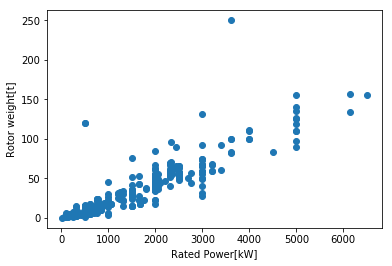

In [6]:
# a general plot to see the relationship between RW and RP
plt.scatter(df_data['Rated power'],df_data['Rotor weight'])
plt.xlabel('Rated Power[kW]')
plt.ylabel('Rotor weight[t]')
plt.show()

In [7]:
# change the loc of wind turbine to numeric values, where 1 means offshore and 0 means onshore
offshore = []
for i in df_data.index:
    if df_data.loc[i][0] == 'Yes':
        offshore.append(1)
    if df_data.loc[i][0] == 'No':
        offshore.append(0)
len(offshore)    

407

In [8]:
df_data['Offshore'] = offshore
df_data['bias'] = np.ravel(np.ones((df_data.shape[0],1))) # adding bias
df_data.head()

,Offshore,Rated power,Rotor diameter,Rotor weight,bias
1,0,20,10,0.1,1.0
3,0,60,15,0.8,1.0
4,0,100,29,3.2,1.0
6,0,100,30,6.7,1.0
7,0,100,25,2.1,1.0


In [9]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,4]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [11]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

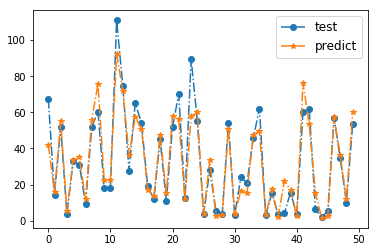

Text(0, 0.5, 'predict')

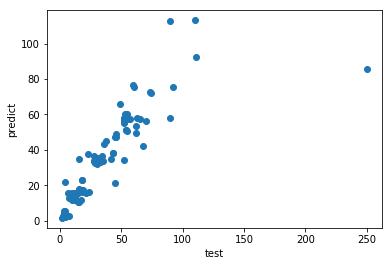

In [14]:
# plot the test dataset with the predicted one
#plt.figure(figsize=(9,6))
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
#plt.ylabel('Rotor diameter[m]',fontsize=12)
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [15]:
from sklearn import metrics

In [16]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

7.121650691018645 334.21272299821004 18.281485798430335


In [17]:
regr.score(x_train, y_train),regr.score(x_test, y_test),regr.coef_

(0.8250958336829893,
 0.7003143430360061,
 array([4.07089886, 0.01980868, 0.13871843, 0.        ]))

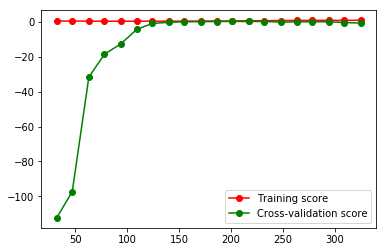

In [18]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

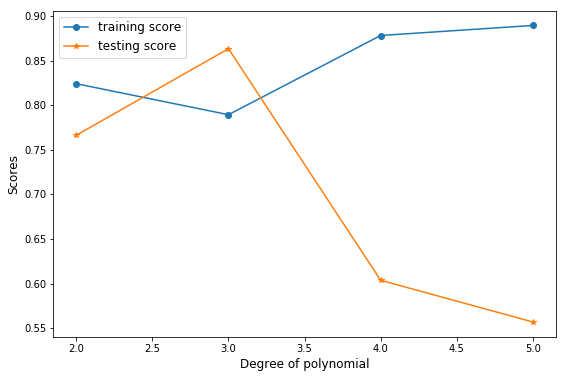

In [19]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
x_p = X[:,[0,1,2]]
y_r = X[:,[3]]
train_scores = []
test_scores = []
for i in range(2,6):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.figure(figsize=(9,6))
plt.plot(range(2,6),train_scores,'o-',label = 'training score')
plt.plot(range(2,6),test_scores,'*-',label = 'testing score')
plt.legend(fontsize = 12)
plt.xlabel('Degree of polynomial',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.show()   

In [20]:
train_scores,test_scores

([0.8240176895510161,
  0.7892892561284154,
  0.8780555896726725,
  0.8893071004530222],
 [0.7662337083547796,
  0.8632715960256191,
  0.6037457627715841,
  0.5569915042063247])

0.8782676420423565 0.6477359836668777


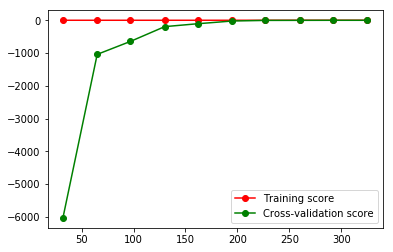

In [49]:
x_p = X[:,[0,1,2]]# only with RP
y_r = X[:,[3]]
poly = PolynomialFeatures(2)
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_train, y_train),regr.score(x_test, y_test))

train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_r, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()


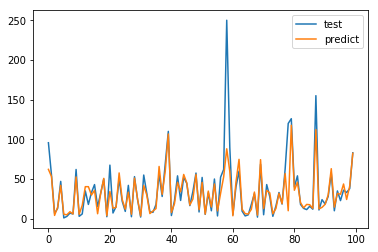

Text(0, 0.5, 'predict')

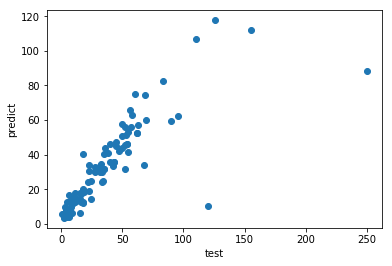

In [50]:
y_pred_LR = regr.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [51]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

8.446059659160214 460.3298014790866 21.45529774855354


In [52]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

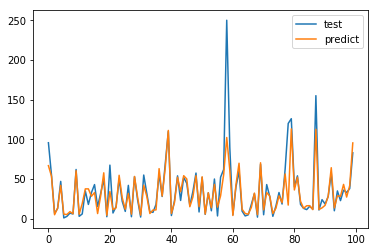

Text(0, 0.5, 'predict')

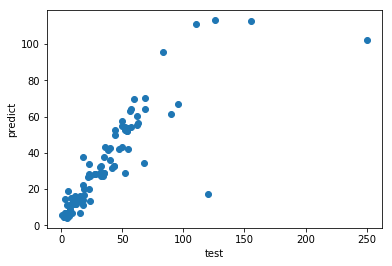

In [53]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [54]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

8.079303666061248 397.9352860995107 19.948315369963215


In [55]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8746541729753308, 0.695482930560488)

In [56]:
#making some tests

In [57]:
x_1 = [[0,2000,110]]
poly = PolynomialFeatures(2)
x_2 = poly.fit_transform(x_1)
RF_model.predict(x_2)

array([57.7997289])

In [58]:
x_1 = [[0,3450,94]]
poly = PolynomialFeatures(2)
x_2 = poly.fit_transform(x_1)
RF_model.predict(x_2)

array([71.40318759])

In [59]:
x_1 = [[0,3000,90]]
poly = PolynomialFeatures(2)
x_2 = poly.fit_transform(x_1)
RF_model.predict(x_2)

array([58.37211921])

In [66]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-5,
            'hidden_layer_sizes': (15,20), 
            'random_state':5,
            'max_iter':500,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,20)) # number of hidden layers
mlp.fit(x_train,np.ravel(y_train))
y_pred_NN = mlp.predict(x_test)

Iteration 1, loss = 5441280185042.65820312
Iteration 2, loss = 904187257017.63598633
Iteration 3, loss = 348179519099.64758301
Iteration 4, loss = 318154809459.86633301
Iteration 5, loss = 53051462981.36442566
Iteration 6, loss = 5858323280.27183628
Iteration 7, loss = 510485714.50603265
Iteration 8, loss = 2499377708.62743759
Iteration 9, loss = 3726917548.67959929
Iteration 10, loss = 3399957959.38436079
Iteration 11, loss = 2480193036.11107683
Iteration 12, loss = 2357446507.58166933
Iteration 13, loss = 1334905754.28282833
Iteration 14, loss = 6857503438.55347157
Iteration 15, loss = 1305858796.40070152
Iteration 16, loss = 805428633.77013659
Iteration 17, loss = 2387116081.26150608
Iteration 18, loss = 425452788.08233273
Iteration 19, loss = 1396877712.01825523
Iteration 20, loss = 833751663.06082213
Iteration 21, loss = 80135210.40871172
Iteration 22, loss = 532743280.79952621
Iteration 23, loss = 145044805.24325943
Iteration 24, loss = 458071767.35698074
Iteration 25, loss = 271

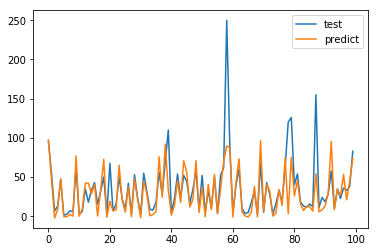

Text(0, 0.5, 'predict')

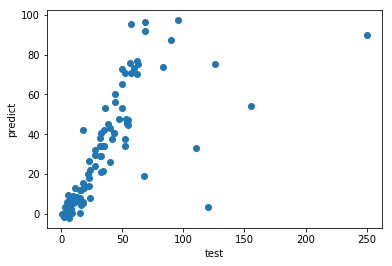

In [67]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [68]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

12.560691504141188 687.8574525443161 26.22703667104456


In [69]:
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

(0.4475114442355904, 0.47362211153965605)

In [70]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)


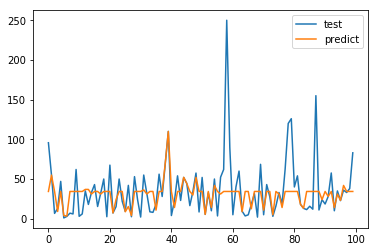

Text(0, 0.5, 'predict')

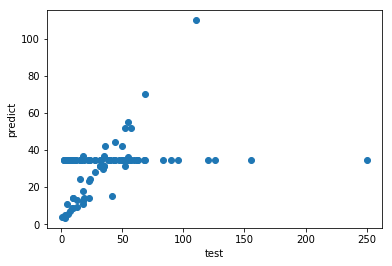

In [71]:
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [72]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

18.909987745098043 1122.8141459268388 33.50841903054871


In [73]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9326538719115627, 0.1407746807420155)

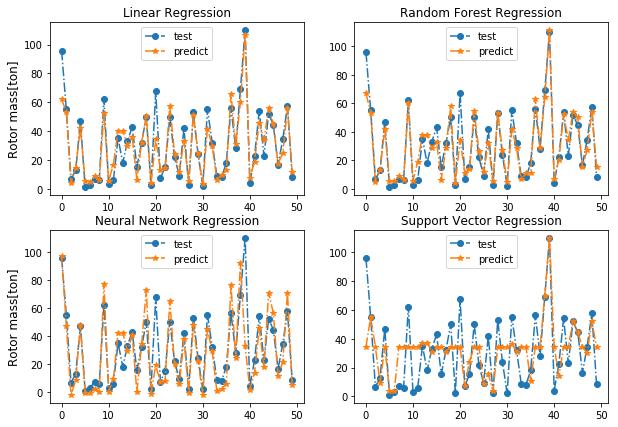

In [74]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Rotor mass[ton]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.subplot(223)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_NN[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Rotor mass[ton]',fontsize=12)
plt.legend()
plt.title('Neural Network Regression')

plt.subplot(224)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_svr_rbf[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Support Vector Regression')

plt.show()

In [75]:
# feature extraction, adding new features P**0.5 ,log(P) and P**2
df_data['P_sqrt'] = df_data['Rated power']**0.5
df_data['P_log'] = np.log(list(df_data['Rated power']))
df_data['P_square'] = df_data['Rated power']**2
df_data['1/P'] = 1/df_data['Rated power']
df_data['R_sqrt'] = [float(i)**0.5 for i in list(df_data['Rotor diameter'])]
df_data['R_log'] = [np.log(float(i)) for i in list(df_data['Rotor diameter'])]
df_data['R_square'] = [float(i)**2 for i in list(df_data['Rotor diameter'])]
df_data['1/R'] = [1/float(i) for i in list(df_data['Rotor diameter'])]
df_data.head()

,Offshore,Rated power,Rotor diameter,Rotor weight,bias,P_sqrt,P_log,P_square,1/P,R_sqrt,R_log,R_square,1/R
1,0,20,10,0.1,1.0,4.47214,2.995732,400,0.05,3.162278,2.302585,100.0,0.100000
3,0,60,15,0.8,1.0,7.74597,4.094345,3600,0.0166667,3.872983,2.708050,225.0,0.066667
4,0,100,29,3.2,1.0,10,4.605170,10000,0.01,5.385165,3.367296,841.0,0.034483
6,0,100,30,6.7,1.0,10,4.605170,10000,0.01,5.477226,3.401197,900.0,0.033333
7,0,100,25,2.1,1.0,10,4.605170,10000,0.01,5.000000,3.218876,625.0,0.040000


In [76]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,4,5,6,7,8,9,10,11,12]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.00059635 0.13110209 0.03597973 0.         0.03768769 0.23419897
 0.02469532 0.06919535 0.19434238 0.04355569 0.17966421 0.04898221]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,4)# using 4 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [3 7 4 9 5 2 8 1 1 1 6 1]


In [78]:
# after feature selection
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,5,11]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [79]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

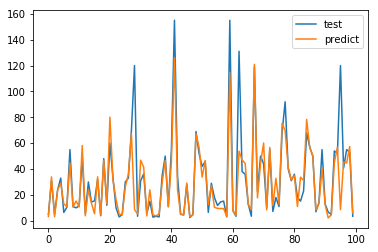

Text(0, 0.5, 'predict')

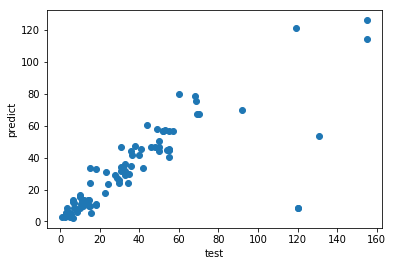

In [80]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [81]:
from sklearn import metrics

In [82]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

7.909823354702514 366.6571921545411 19.148294758399274


In [83]:
regr.score(x_train, y_train),regr.score(x_test, y_test)

(0.8537404826537642, 0.6572574932980536)

In [84]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [85]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

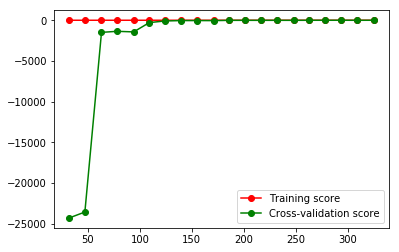

In [86]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [87]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

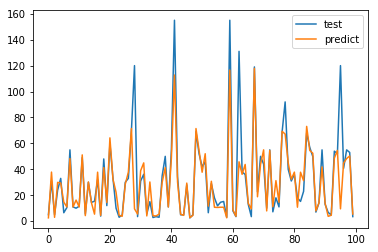

Text(0, 0.5, 'predict')

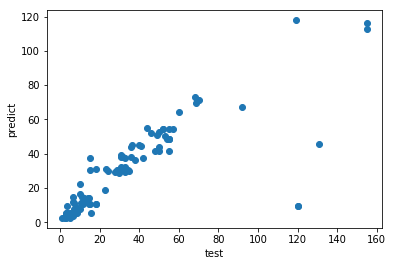

In [88]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [89]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

7.685044567303549 376.7420180609615 19.40984332911942


In [90]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8775878894395719, 0.6478304355864395)

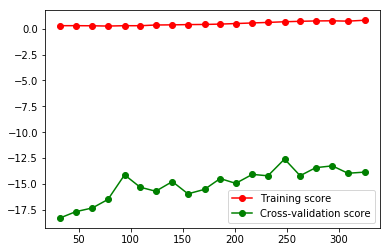

In [91]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [92]:
train_scores_mean

array([0.28913339, 0.29148018, 0.27946622, 0.25388803, 0.28767468,
       0.28606731, 0.35511918, 0.37017582, 0.39482966, 0.40870036,
       0.44331104, 0.49523597, 0.55345346, 0.60454119, 0.66933739,
       0.71257593, 0.74746859, 0.76220116, 0.72741654, 0.81518699])

In [93]:
test_scores_mean

array([-18.27657549, -17.67391904, -17.31492568, -16.49094505,
       -14.11787349, -15.31086812, -15.69872002, -14.76723894,
       -15.94935854, -15.51957542, -14.47526697, -14.93891142,
       -14.07214527, -14.20953853, -12.59211545, -14.19993048,
       -13.42384975, -13.24912257, -13.96343011, -13.85413755])

In [94]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

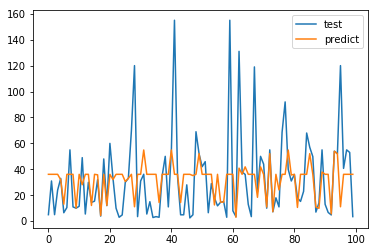

Text(0, 0.5, 'predict')

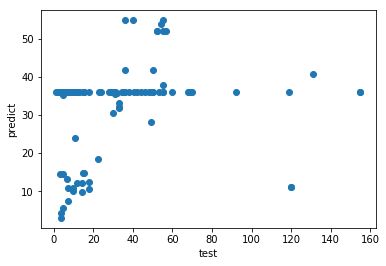

In [95]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [96]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

20.66310174278071 1035.980993140513 32.18665862031213


In [97]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9489852394271073, 0.031589369901430686)

In [98]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-5,
            'hidden_layer_sizes': (20,20), 
            'random_state':10,
            'max_iter':100,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,20)) # number of hidden layers
mlp.fit(x_train,y_train)
y_pred_NN = mlp.predict(x_test)

Iteration 1, loss = 5709087.65648798
Iteration 2, loss = 607751.49361622
Iteration 3, loss = 118446.28259565
Iteration 4, loss = 96419.35004622
Iteration 5, loss = 14420.79212022
Iteration 6, loss = 3979.34438980
Iteration 7, loss = 2701.21654447
Iteration 8, loss = 1093.54182347
Iteration 9, loss = 1093.81514055
Iteration 10, loss = 1093.99950615
Iteration 11, loss = 1094.09860929
Iteration 12, loss = 1092.77638322
Iteration 13, loss = 2053.77925500
Iteration 14, loss = 1667.15615622
Iteration 15, loss = 474.68501061
Iteration 16, loss = 182.71768322
Iteration 17, loss = 215.02120241
Iteration 18, loss = 359.09719308
Iteration 19, loss = 232.96194368
Iteration 20, loss = 107.91964489
Iteration 21, loss = 147.47618103
Iteration 22, loss = 104.49406357
Iteration 23, loss = 84.98739130
Iteration 24, loss = 132.19288041
Iteration 25, loss = 123.68649111
Iteration 26, loss = 95.49482891
Iteration 27, loss = 113.99117293
Iteration 28, loss = 96.38248606
Iteration 29, loss = 114.73180150
Ite

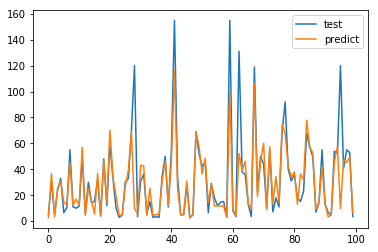

Text(0, 0.5, 'predict')

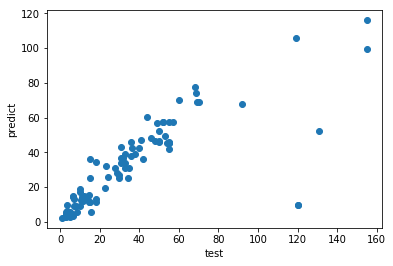

In [99]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [100]:
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

(0.8370636292372237, 0.6404983035104588)

In [101]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

8.229464699128416 384.58574595265014 19.61085785866213


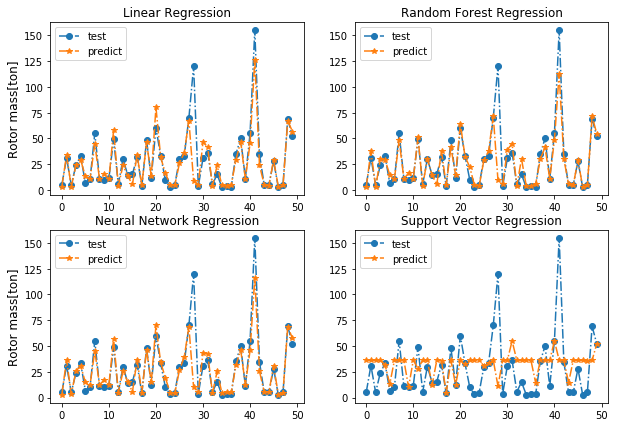

In [102]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Rotor mass[ton]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.subplot(223)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_NN[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Rotor mass[ton]',fontsize=12)
plt.legend()
plt.title('Neural Network Regression')

plt.subplot(224)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_svr_rbf[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Support Vector Regression')

plt.show()